In [12]:
#setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import datetime
import matplotlib.dates
import locale
from scipy.stats import linregress

#read in data recorded for 70 years
tor70Path = "70YearTornadoReport.csv"
tor70= pd.read_csv(tor70Path)
tor70.head()

,Observation Time,Maximum Category,Path Length (miles),Path Width (yards),Injuries,Fatalities,Monetary Loss,Origin Latitude,Origin Longitude,Track End Latitude,Track End Longitude,Affected Counties
0,5/12/1950 14:00,F-1,2.0,10,0,0,"$4,000",35.75,-77.42,0.00,0.00,Pitt County NC
1,5/12/1950 17:00,F-0,1.0,200,0,0,$0 or unknown,35.73,-78.40,0.00,0.00,Wake County NC
2,5/14/1950 17:00,F-1,3.8,50,0,0,"$3,000",35.30,-79.80,35.33,-79.75,Montgomery County NC
3,5/14/1950 17:30,F-2,2.0,10,5,0,$0 or unknown,35.00,-80.68,0.00,0.00,Union County NC
4,5/31/1950 15:30,F-1,0.1,10,0,0,"$3,000",35.42,-77.25,0.00,0.00,Pitt County NC


In [13]:
#checking the number of tornadoes from data recorded for 70 years
num_tornadoes = tor70["Observation Time"].nunique()
num_tornadoes




1356

In [14]:
#allows for dates to be utilized later on in graphs
date_objects = [datetime.datetime.strptime(date, '%m/%d/%Y %H:%M').date() for date in tor70.loc[:,"Observation Time"]] 
values = tor70.loc[:,"Observation Time"]
values.head()

0    5/12/1950 14:00
1    5/12/1950 17:00
2    5/14/1950 17:00
3    5/14/1950 17:30
4    5/31/1950 15:30
Name: Observation Time, dtype: object

Text(0, 0.5, 'Tornado Frequency')

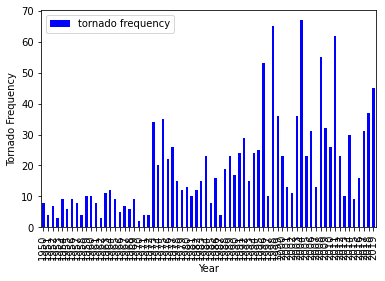

In [15]:
#bar graph on frequency of tornados over time
tor70['Year'] = pd.DatetimeIndex(tor70['Observation Time']).year
tor70Grouped = (tor70.groupby(['Year']).size().reset_index(name = "tornado frequency"))



tor70Plot = tor70Grouped.plot.bar(x = "Year", y = "tornado frequency", color = "blue")
tor70Plot.set_ylabel("Tornado Frequency")

In [16]:
##read in data recorded for 40 years
tor40Path = "40YearTornadoReport.csv"
tor40 = pd.read_csv(tor40Path)
tor40.head()

,Observation Time,Maximum Category,Path Length (miles),Path Width (yards),Injuries,Fatalities,Monetary Loss,Origin Latitude,Origin Longitude,Track End Latitude,Track End Longitude,Affected Counties
0,2/23/1980 17:00,F-0,0.1,10,0,0,$0 or unknown,35.62,-77.60,0.00,0.00,Pitt County NC
1,2/25/1980 16:15,F-0,0.1,10,0,0,"$2,000",35.02,-78.57,0.00,0.00,Clay County NC
2,3/24/1980 22:25,F-1,1.2,150,0,0,"$5,000",36.27,-77.28,0.00,0.00,Northampton County NC
3,4/9/1980 0:15,F-1,1.9,37,0,0,"$5,000",36.15,-80.30,36.15,-80.27,Forsyth County NC
4,4/27/1980 11:15,F-0,0.1,10,0,0,$0 or unknown,34.13,-78.10,0.00,0.00,Brunswick County NC


In [17]:
#allows for dates to be utilized later on in graphs(40 years)
date_objects = [datetime.datetime.strptime(date, '%m/%d/%Y %H:%M').date() for date in tor40.loc[:,"Observation Time"]] 
values = tor40.loc[:,"Observation Time"]
values.head()

0    2/23/1980 17:00
1    2/25/1980 16:15
2    3/24/1980 22:25
3      4/9/1980 0:15
4    4/27/1980 11:15
Name: Observation Time, dtype: object

Text(0, 0.5, 'Tornado Frequency')

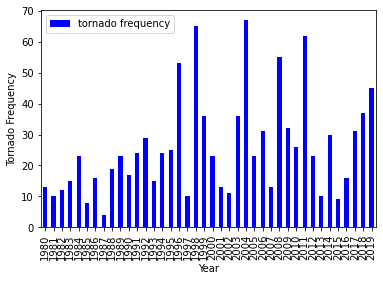

In [18]:
#bar graph on frequency of tornados over time(40 years)
tor40['Year'] = pd.DatetimeIndex(tor40['Observation Time']).year
tor40Grouped = (tor40.groupby(['Year']).size().reset_index(name = "tornado frequency"))



tor40Plot = tor40Grouped.plot.bar(x = "Year", y = "tornado frequency", color = "blue")
tor40Plot.set_ylabel("Tornado Frequency")

In [19]:
##eliminate values of Monetary Loss that are $0 or unkown(making assumption that if a tornado caused even the slightest form of environmental damage, there must be some cost)
tor40.drop(tor40.index[tor40['Monetary Loss'] == "$0 or unknown"], inplace = True)
tor40.head()

,Observation Time,Maximum Category,Path Length (miles),Path Width (yards),Injuries,Fatalities,Monetary Loss,Origin Latitude,Origin Longitude,Track End Latitude,Track End Longitude,Affected Counties,Year
1,2/25/1980 16:15,F-0,0.1,10,0,0,"$2,000",35.02,-78.57,0.00,0.00,Clay County NC,1980
2,3/24/1980 22:25,F-1,1.2,150,0,0,"$5,000",36.27,-77.28,0.00,0.00,Northampton County NC,1980
3,4/9/1980 0:15,F-1,1.9,37,0,0,"$5,000",36.15,-80.30,36.15,-80.27,Forsyth County NC,1980
5,5/18/1980 1:40,F-2,3.3,50,0,0,"$5,000",35.10,-80.43,35.12,-80.38,Union County NC,1980
6,5/20/1980 13:42,F-1,0.2,10,0,0,"$4,000",34.48,-79.08,0.00,0.00,Robeson County NC,1980


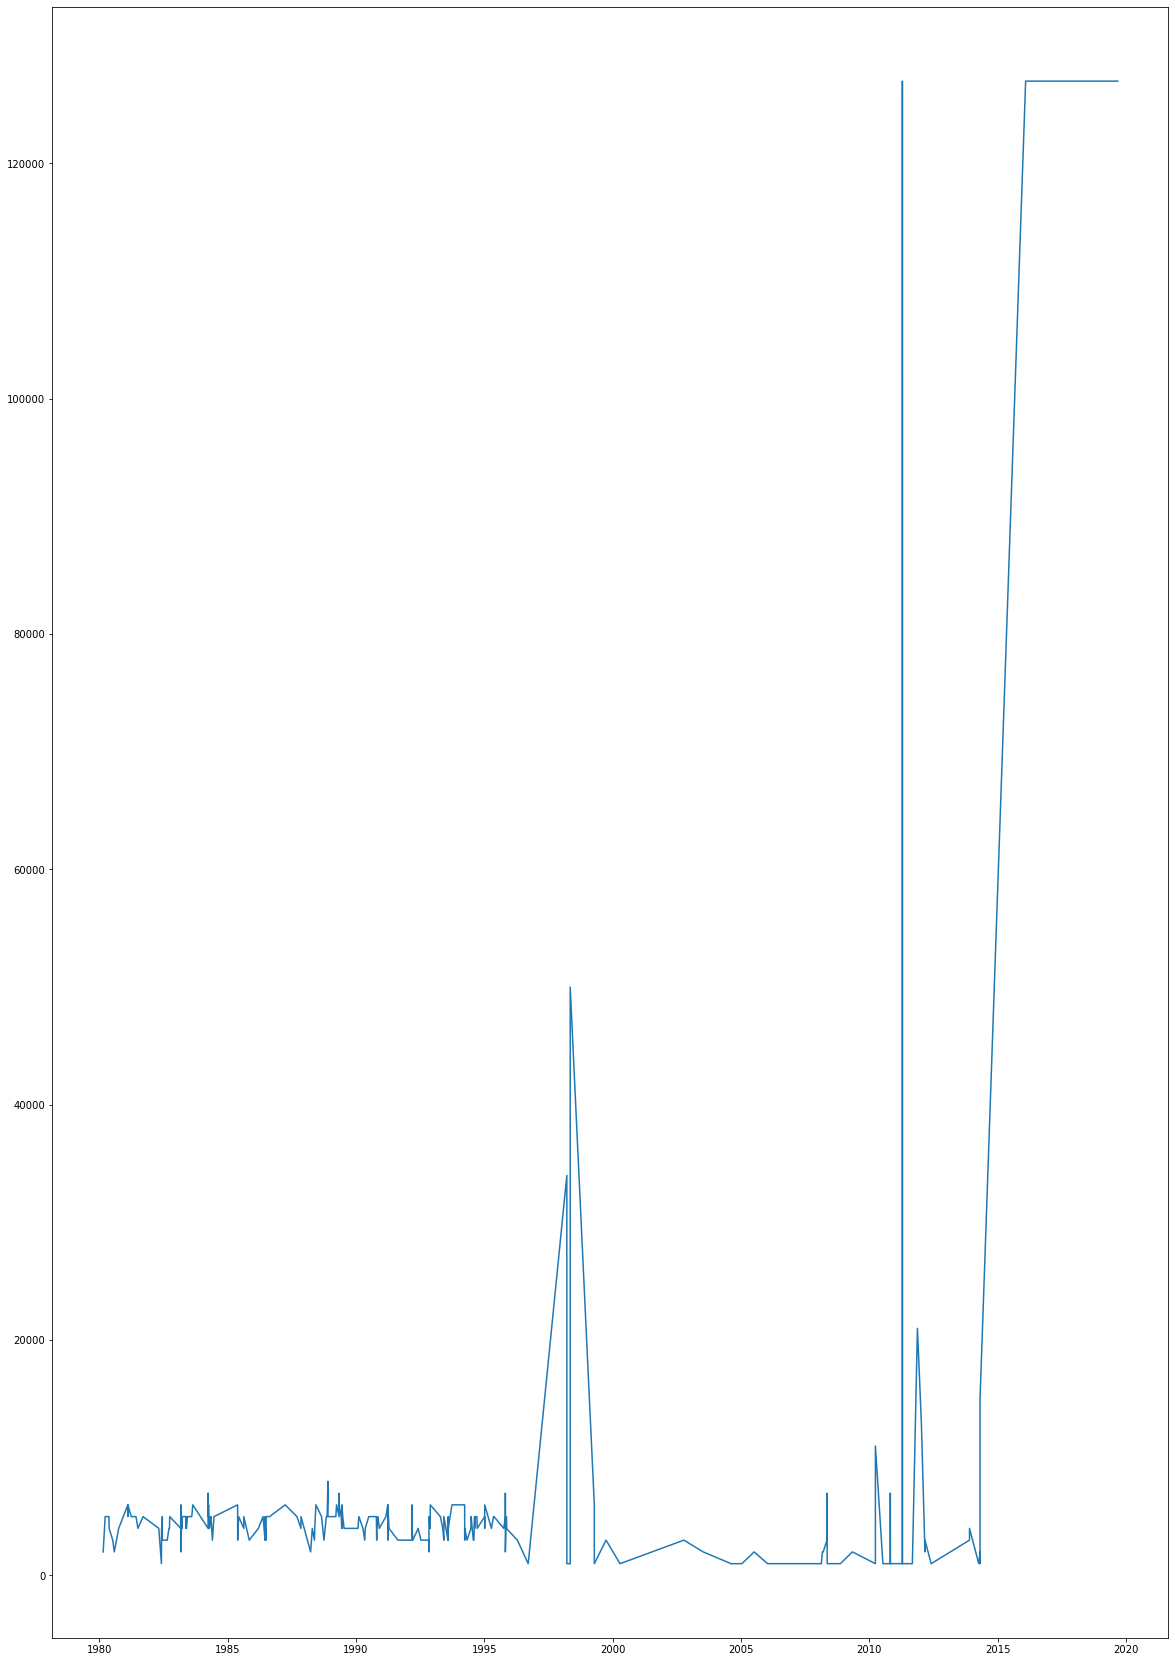

In [20]:
##line graph on cost in terms of monetary loss from tornado damages over time
tor40.drop(tor40.index[tor40['Monetary Loss'] == "$0 or unknown"], inplace = True)
dates = tor40.loc[:,"Observation Time"]
dateVals = []

for date in dates:
    dateVals.append(datetime.datetime.strptime(date, '%m/%d/%Y %H:%M'))
    
locale.setlocale(locale.LC_ALL, 'en_US.UTF8')    
    

damageCost = []


for line in tor40["Monetary Loss"]:
    damageCost.append(locale.atof(line.strip("$")))

plt.figure(figsize = (20,30))
plt.plot(dateVals, damageCost)